# setup

In [513]:
!pip install pillow


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install pillow pytesseract

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,565 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
!sudo apt install tesseract-ocr-ara # Install Arabic language data
import os
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata' # Set TESSDATA_PREFIX

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ara
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 645 kB of archives.
After this operation, 1,447 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ara all 1:4.00~git30-7274cfa-1.1 [645 kB]
Fetched 645 kB in 1s (1,002 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-ara.
(Reading data

In [19]:
pip install ArabicOcr

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB 1.4 MB/s eta 0:00:03
   - -------------------------------------- 0.1/2.9 MB 1.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.2/2.9 MB 1.8 MB/s eta 0:00:02
   ----- ---------------------------------- 0.4/2.9 MB 2.1 MB/s eta 0:00:02
   ----- ---------------------------------- 0.4/2.9 MB 2.0 MB/s eta 0:00:02
   -------- ------------------------------- 0.6/2.9 MB 2.4 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.9 MB 2.4 MB/s eta 0:00:01
   ---------- ----------------------------- 0.8/2.9 MB 2.1 MB/s eta 0:00:01
   ------------- -------------------------- 1.0/2.9 MB 2.3 MB/s eta 0:00:01
   ---------------- ----------------------- 1.2/2.9 MB 2.5 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.9 MB 2.7 MB/s eta 0:00:01
   --------------------- ------------------ 1.5/2.9 MB 2.8 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# begin

In [545]:
import pytesseract
from pytesseract import *
pytesseract.tesseract_cmd = r'D:\blackboard\AI_online\cloudilic\tesseract.exe'

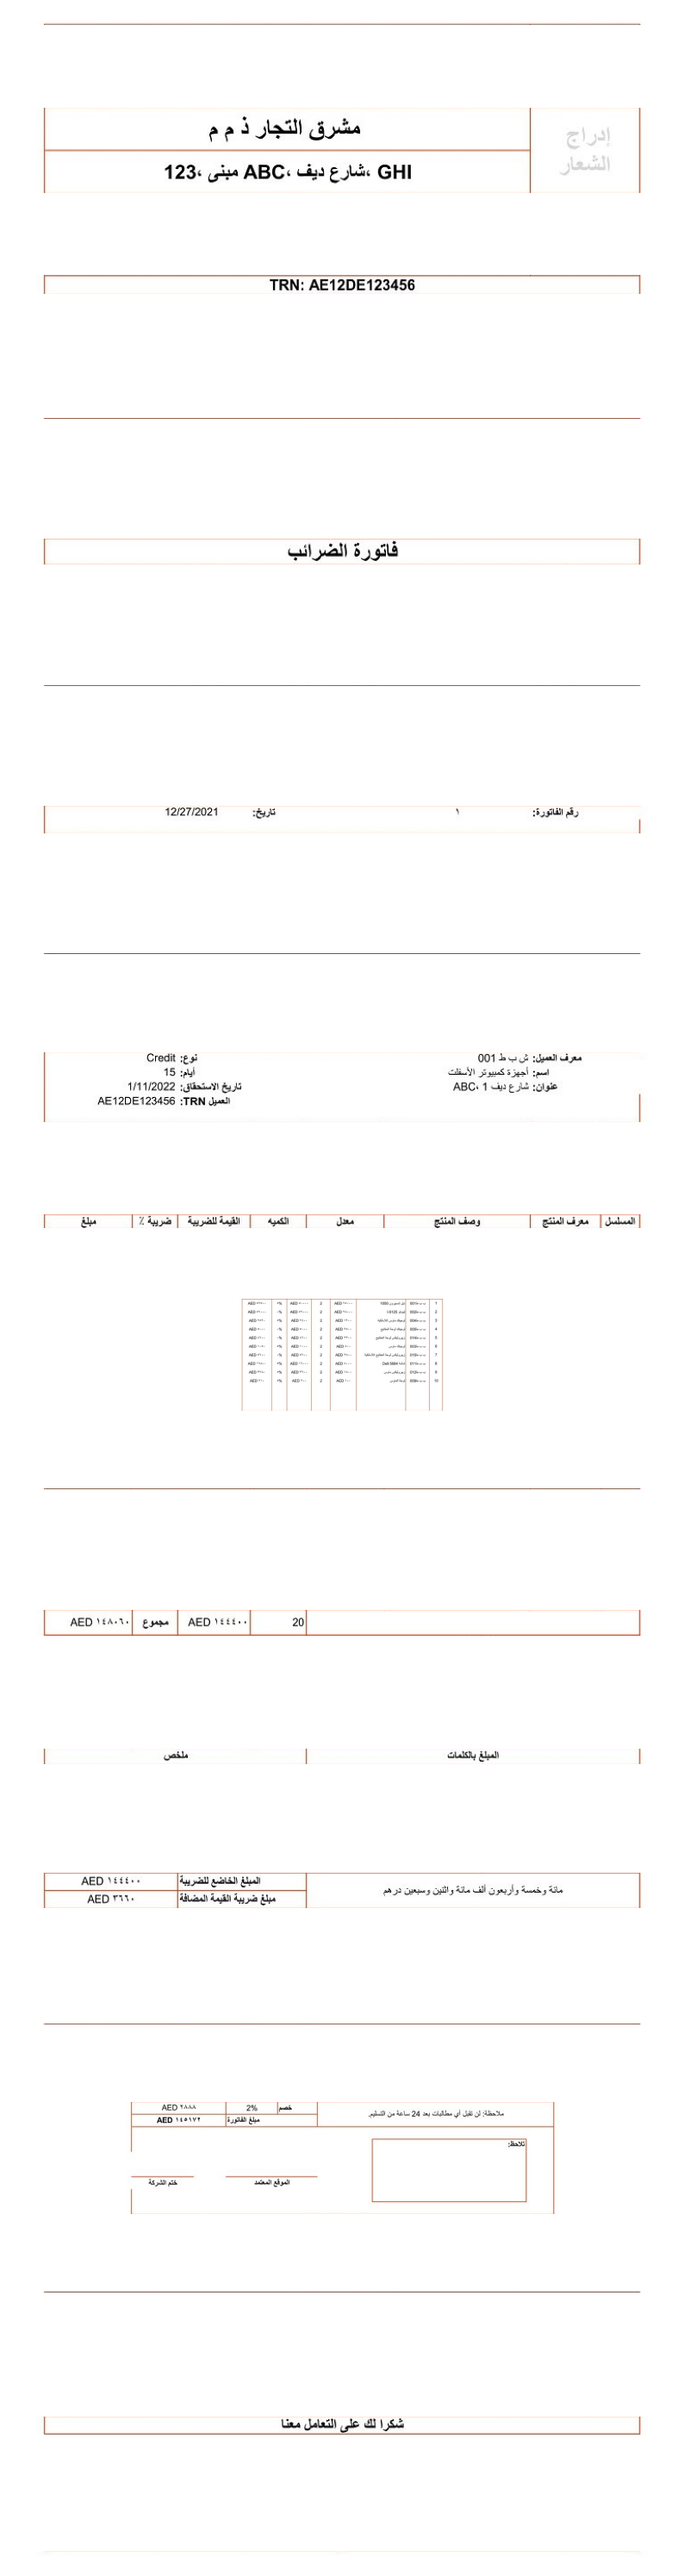

In [546]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image = Image.open('WhatsApp Image 2024-11-14 at 8.41.26 PM (1).jpeg')
from PIL import Image, ImageOps
import numpy as np

# Convert image to grayscale
gray_image = ImageOps.grayscale(image)

# Convert grayscale image to numpy array
gray_array = np.array(gray_image)

# Detect row lines by finding rows with significant changes in pixel values
row_lines = []
threshold = 75  # Threshold for detecting significant changes

for y in range(1, gray_array.shape[0]):
    if np.abs(np.mean(gray_array[y]) - np.mean(gray_array[y - 1])) > threshold:
        row_lines.append(y)

# Add the last row as the end of the last segment
row_lines.append(gray_array.shape[0])

# Cut the image based on detected row lines
cut_images = []
start_row = 0

for end_row in row_lines:
    cut_image = image.crop((0, start_row, image.width, end_row))
    cut_images.append(cut_image)
    start_row = end_row

# Display all cut images
fig, axes = plt.subplots(nrows=len(cut_images), figsize=(10, len(cut_images) * 2))
for i, ax in enumerate(axes):
    ax.imshow(cut_images[i])
    ax.axis('off')

plt.show()


In [547]:
def display_cut_image(index):
    if 0 <= index < len(cut_images):
        plt.imshow(cut_images[index])
        plt.axis('off')
        plt.show()
    else:
        print("Index out of range. Please select an index between 0 and", len(cut_images) - 1)

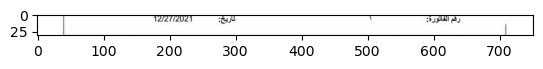

In [548]:
selected_image = cut_images[6]

# Convert selected image to numpy array for OpenCV processing
img = np.array(selected_image)
import cv2
# Apply the given code on the selected image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

In [549]:
res = pytesseract.image_to_string(gray, lang='eng').split()
print(res)

['12/27/2021', 'et', 'y']


In [551]:
res = pytesseract.image_to_string(selected_image, lang="ara_num_lolo").split()
res=res[2]
print(res)

١


# part **2**

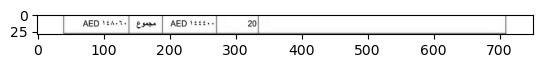

In [552]:
selected_image = cut_images[12]

# Convert selected image to numpy array for OpenCV processing
img = np.array(selected_image)

# Apply the given code on the selected image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

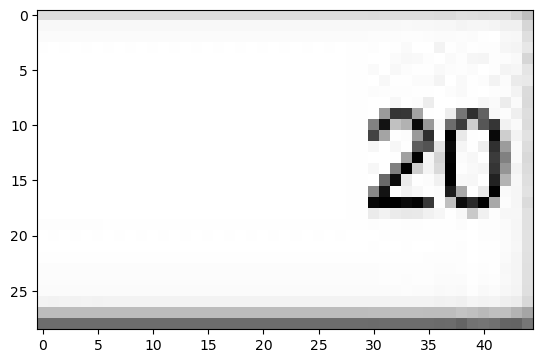

In [553]:
space2 = gray[:, 290:290+45]
plt.imshow(cv2.cvtColor(space2, cv2.COLOR_BGR2RGB))
plt.show()

In [554]:
from prerocess import *
t=threshold_eng_num(space2)
t=detect_digit_only(t).split()
total_amount=t[0]
print(total_amount)

20


# part 3

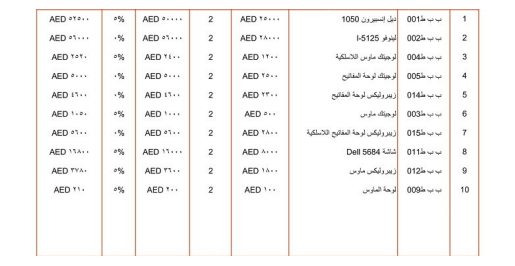

In [555]:
display_cut_image(10)
selected_image = cut_images[10]
# Convert selected image to numpy array for OpenCV processing
img = np.array(selected_image)

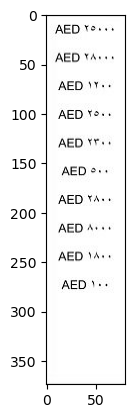

In [556]:
cut=img[:,340:420]
# Convert selected image to numpy array for OpenCV processing
img = np.array(cut)

# Apply the given code on the selected image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

In [557]:
denoised_image = cv2.bilateralFilter(cut, 9, 75, 75)

# Convert to grayscale
gray = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
enhanced_image = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Sharpen the image
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened_image = cv2.filter2D(enhanced_image, -1, kernel)
res=pytesseract.image_to_string(enhanced_image, lang="ara_num_lolo").split()
print(res)
second_prod_cost=res[1]
print('second_prod_cost',second_prod_cost)

['٨٤٠٤٢٥', '٨٤٥٢٨٠٠٠', '٨٤٠٤', '١٢٠٠', '٨٤٠٤٢٥٠٠', '٨٤٠٤٢٣٠٠', '٨٤٤٤٠٠', '٨٤٠٤٢٨٠٠', '٨٤٠٤٨٠٠٠', '٨٤٠٤٢٨٠٣', '٨٤٥٢٠٠']
second_prod_cost ٨٤٥٢٨٠٠٠


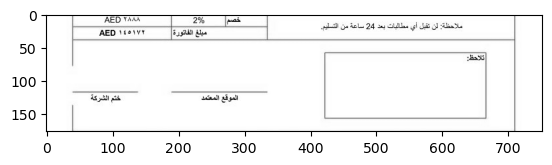

In [558]:
selected_image = cut_images[16]

# Convert selected image to numpy array for OpenCV processing
img = np.array(selected_image)

# Apply the given code on the selected image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

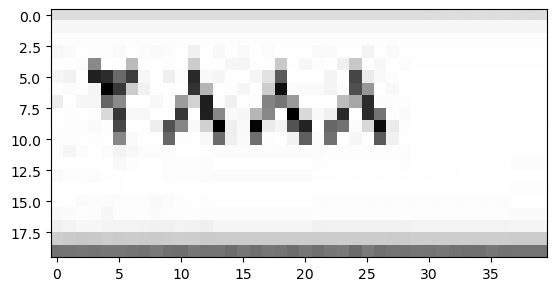

In [559]:
cut=img[:20,115:155]
nn = cv2.cvtColor(cut, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(nn, cv2.COLOR_BGR2RGB))
plt.show()

In [561]:
pytesseract.image_to_string(cut, lang="ara_num_lolo").split()

['٢٨٨٨']

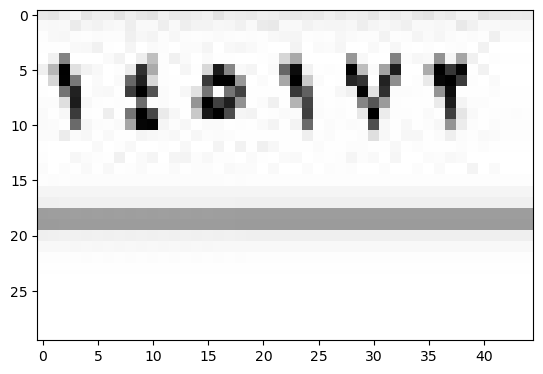

In [562]:
cut=img[20:50,110:155]
nn = cv2.cvtColor(cut, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(nn, cv2.COLOR_BGR2RGB))
plt.show()

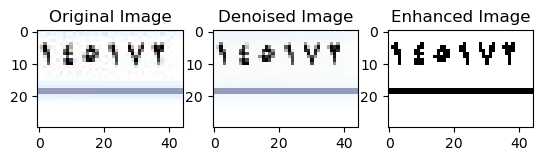

In [563]:
# Apply bilateral filter for denoising while preserving edges
denoised_image = cv2.bilateralFilter(cut, 9, 75, 75)

# Convert to grayscale
gray = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
enhanced_image = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Sharpen the image
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened_image = cv2.filter2D(enhanced_image, -1, kernel)

# Display the original and enhanced images
plt.subplot(131), plt.imshow(cv2.cvtColor(cut, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(132), plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image')
plt.subplot(133), plt.imshow(sharpened_image, cmap='gray')
plt.title('Enhanced Image')
plt.show()

In [564]:
pytesseract.image_to_string(cut, lang="ara_num_lolo").split()

['١٤٠١٧٢']

In [565]:
pytesseract.image_to_string(sharpened_image, lang="ara_num_lolo").split()

['١٤٠١٧٢']